In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesity-prediction/Obesity prediction.csv


### ****Introduction****

This dataset contains information about lifestyle habits and physical condition of individuals from Colombia, Peru and Mexico. It was collected by Palechor & Manatos (2019). 

The following is a table that describes the different variables present in this dataset. 

In [2]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Variable name", "Question asked", "Options"]
table.add_row(["Gender", "What is your gender?", "Male, Female"])
table.add_row(["Age", "What is your age?", "Numeric value"])
table.add_row(["Height", "What is your height?", "Numeric value in meters"])
table.add_row(["Weight", "What is your weight?", "Numeric value in kg"])
table.add_row(["family_history", "Has a family member suffered/suffer from overweight?", "No, Yes"])
table.add_row(["FAVC", "Do you eat high caloric food frequently?", "No, Yes"])
table.add_row(["FCVC", "Do you usually eat vegetables in your meals?", "Never, Sometimes, Always"])
table.add_row(["NCP", "How many main meals do you have daily?", "1-2, 3, >3"])
table.add_row(["CAEC", "Do you eat any food between meals?", "No, Sometimes, Frequently, Always"])
table.add_row(["SMOKE", "Do you smoke?", "No, Yes"])
table.add_row(["CH2O", "How much water do you drink daily?", "<1L, 1-2L, >2L"])
table.add_row(["SCC", "Do you monitor the calories you eat daily?", "No, Yes"])
table.add_row(["FAF", "How often do you have physical activity?", "Never, 1-2 days, 2-4 days, 4-5 days"])
table.add_row(["TUE", "How much time do you use technological devices?", "0-2 hours, 3-5 hours, >5 hours"])
table.add_row(["CALC", "How often do you drink alcohol?", "Never, Sometimes, Frequently, Always"])
table.add_row(["MTRANS", "Which transportation do you use?", "Walking, Bike, Public transportation,\nMotorbike, Automobile"])
table.add_row(["Obesity", "Category of body weight", "Underweight, Normal, Overweight I, Overweight II,\nObesity I, Obesity II, Obesity III"])

print(table)

+----------------+------------------------------------------------------+---------------------------------------------------+
| Variable name  |                    Question asked                    |                      Options                      |
+----------------+------------------------------------------------------+---------------------------------------------------+
|     Gender     |                 What is your gender?                 |                    Male, Female                   |
|      Age       |                  What is your age?                   |                   Numeric value                   |
|     Height     |                 What is your height?                 |              Numeric value in meters              |
|     Weight     |                 What is your weight?                 |                Numeric value in kg                |
| family_history | Has a family member suffered/suffer from overweight? |                      No, Yes                

In [3]:
data = pd.read_csv("/kaggle/input/obesity-prediction/Obesity prediction.csv")
data = data.dropna()
data.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Exploring the data, I saw that entries for some categorical variables are presented as numeric (specifically, values of float type). This doesn't make sense when aligning with the definition of the variables mentioned in the introduction.

To rectify this, I decided to round all the values in these columns. 

In [4]:
data["FCVC"] = data["FCVC"].round(0)
data["NCP"] = data["NCP"].round(0)
data["CH2O"] = data["CH2O"].round(0)
data["FAF"] = data["CH2O"].round(0)
data["TUE"] = data["CH2O"].round(0)

Next, I made all the categorical variables factors using LabelEncoder(). 

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_var = ["Gender", "family_history", "FAVC", "FCVC", "NCP", "CAEC", "SMOKE", "CH2O", "SCC", "FAF", "TUE", "CALC", "MTRANS", "Obesity"]

factor_dict = {}
for cat in categorical_var: 
    data[cat] = le.fit_transform(data[cat])
    # to ensure order of classes in each category make sense 
    le_name_mapping = list(zip(le.classes_, le.transform(le.classes_)))
    factor_dict[cat] = le_name_mapping

# Initialize table
class_map_table = PrettyTable()

# Set the field names
class_map_table.field_names = ["Variable", "Class mapping"]

# Add rows from the dictionary
for key, value in factor_dict.items():
    class_map_table.add_row([key, value])

# Makes text wrap once length as reached max
class_map_table._max_width = {"Class mapping": 100}

# Print the table
print(class_map_table)

+----------------+------------------------------------------------------------------------------------------------------+
|    Variable    |                                            Class mapping                                             |
+----------------+------------------------------------------------------------------------------------------------------+
|     Gender     |                                     [('Female', 0), ('Male', 1)]                                     |
| family_history |                                       [('no', 0), ('yes', 1)]                                        |
|      FAVC      |                                       [('no', 0), ('yes', 1)]                                        |
|      FCVC      |                                    [(1.0, 0), (2.0, 1), (3.0, 2)]                                    |
|      NCP       |                               [(1.0, 0), (2.0, 1), (3.0, 2), (4.0, 3)]                               |
|      CAEC      |      

Preprocessing for the quantitative variables involves scaling their values. I did this using StandardScaling().

In [6]:
from sklearn.preprocessing import StandardScaler

quant_var = ["Age", "Height", "Weight"]

scaler = StandardScaler()
data[quant_var] = scaler.fit_transform(data[quant_var])

quant_df = pd.melt(data, value_vars=["Age", "Height", "Weight"])
quant_df

,variable,value
0,Age,-0.522124
1,Age,-0.522124
2,Age,-0.206889
3,Age,0.423582
4,Age,-0.364507
...,...,...
6328,Weight,1.711763
6329,Weight,1.800914
6330,Weight,1.798868
6331,Weight,1.785780


Now, let's visualize the data. I plotted histograms for the quantitative variables to visualize their distributions. For the categorical variables, I plotted bar plots stratified by the obesity status.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


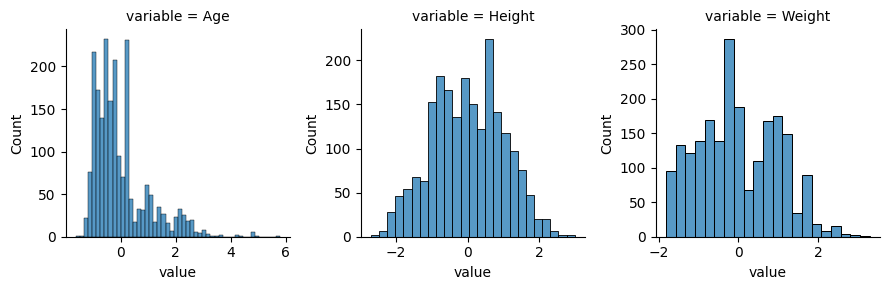

In [7]:
import seaborn as sb 
import matplotlib.pyplot as plt 

# Create facet grid with histograms
g = sb.FacetGrid(quant_df, col = "variable", sharex = False, sharey = False)
g.map(sb.histplot, "value")
plt.show()

In [8]:
cat_df = pd.melt(data, id_vars = "Obesity", value_vars=["Gender", "family_history", "FAVC", "FCVC", "NCP", "CAEC", "SMOKE", "CH2O", "SCC", "FAF", "TUE", "CALC", "MTRANS", "Obesity"])
cat_df.head()

,Obesity,variable,value
0,1,Gender,0
1,1,Gender,0
2,1,Gender,1
3,5,Gender,1
4,6,Gender,1


In [ ]:
# Create facet grid with histograms
g = sb.catplot(data = cat_df, 
               x = "value",
               hue = "Obesity",
               kind="count", 
               col="variable",
              col_wrap = 4, 
              sharex = False, 
              sharey = False)
plt.show()

It looks like there definitely are some relationships between these variables and Obesity.

## ****Running Predictive Models****

Next, I will assess the performance of some prediction models for this dataset. The goal is to use all the features to predict obesity level of the patient. 

The models I will be applying are: 
* Random rorest
* Multinomial logistic regression

I chose these two models since their requirements/assumptions align with this dataset and the predictive task, namely: 
* Predictor variables are quantitative and categorical
* Response variable is categorical
* Response variable is multiclass

### ****Train/Test Split****

In [13]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

# Retrying, but dropping weight this time since it is obviously related to Obesity and is likely overshadowing the correlation of other variables with Obesity
X = data.drop(["Obesity"], axis=1)
y = data["Obesity"]

print(f"Shape of X: {X.shape} Shape of y: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Shape of X_train: {X_train.shape} Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape} Shape of y_test: {y_test.shape}")

Shape of X: (2111, 16) Shape of y: (2111,)
Shape of X_train: (1688, 16) Shape of y_train: (1688,)
Shape of X_test: (423, 16) Shape of y_test: (423,)


### ****Random Forest****

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

# Get classification report 
print("\nClassification report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Get feature importances
importances = rf.feature_importances_
features_list = data.columns.tolist()[:-1]

# Create a dataframe to display feature importances
feature_importances = pd.DataFrame({'feature': features_list, 'importance': importances})

# Sort the dataframe by importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

print("\nFeature importances:")
print(feature_importances)

Accuracy: 0.9456264775413712

Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.89      0.87      0.88        62
           2       0.99      0.95      0.97        78
           3       0.98      0.98      0.98        58
           4       1.00      1.00      1.00        63
           5       0.83      0.89      0.86        56
           6       0.94      0.96      0.95        50

    accuracy                           0.95       423
   macro avg       0.94      0.95      0.94       423
weighted avg       0.95      0.95      0.95       423


Feature importances:
           feature  importance
3           Weight    0.387499
2           Height    0.137055
1              Age    0.123559
0           Gender    0.071167
6             FCVC    0.042376
14            CALC    0.038489
8             CAEC    0.037952
7              NCP    0.034673
4   family_history    0.032885


### ****Multinomial Logistic Regression****

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

# Create a LogisticRegression model
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = lr.predict(X_test)

# Evaluate the model
print(f"Accuracy: {lr.score(X_test, y_test)}") 

# Get classification report 
print("\nClassification report for Multinomial Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Compute importances
# Coefficients and Odds Ratios
coefficients = lr.coef_[0]
odds_ratios = np.exp(coefficients)

# Display feature importance using coefficients and odds ratios
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})
print("\nFeature Importance (Coefficient and Odds Ratio):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))

Accuracy: 0.8865248226950354

Classification report for Multinomial Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        56
           1       0.91      0.68      0.78        62
           2       0.93      0.87      0.90        78
           3       0.86      0.98      0.92        58
           4       1.00      1.00      1.00        63
           5       0.77      0.88      0.82        56
           6       0.85      0.80      0.82        50

    accuracy                           0.89       423
   macro avg       0.89      0.89      0.88       423
weighted avg       0.89      0.89      0.88       423


Feature Importance (Coefficient and Odds Ratio):
           Feature  Coefficient  Odds Ratio
2           Height     3.386327   29.557185
6             FCVC     0.329357    1.390075
14            CALC     0.165243    1.179679
10            CH2O     0.024188    1.024483
12             FAF     0.024188    1.024483


### ****Conclusions****

Random forest performs better than logistic regression at predicting obesity status using all the features in the dataset. Although, both algorithms have high accuract scores. 

Looking at the feature importances from both models, Weight shows the highest correlation with Obesity status. Of course, this relationship is not surprising. In fact, the presence of this feature is likely inflating the predicitive performance of the models, and overshadowing the influence of other features. Therefore, I decided to remove this feature and rerun the models.

## ****Re-runing Predictive Models****

### ****Train/Test Split****

In [ ]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

# Retrying, but dropping weight this time since it is obviously related to Obesity and is likely overshadowing the correlation of other variables with Obesity
X = data.drop(["Obesity", "Weight"], axis=1)
y = data["Obesity"]

print(f"Shape of X: {X.shape} Shape of y: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Shape of X_train: {X_train.shape} Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape} Shape of y_test: {y_test.shape}")

Shape of X: (2111, 15) Shape of y: (2111,)
Shape of X_train: (1688, 15) Shape of y_train: (1688,)
Shape of X_test: (423, 15) Shape of y_test: (423,)


### ****Random Forest****

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

# Get classification report 
print("\nClassification report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Get feature importances
importances = rf.feature_importances_
features_list = data.columns.tolist()[:-1]
features_list.remove("Weight")

# Create a dataframe to display feature importances
feature_importances = pd.DataFrame({'feature': features_list, 'importance': importances})

# Sort the dataframe by importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)

Accuracy: 0.8037825059101655

Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        56
           1       0.64      0.60      0.62        62
           2       0.81      0.83      0.82        78
           3       0.84      0.88      0.86        58
           4       0.98      1.00      0.99        63
           5       0.78      0.71      0.75        56
           6       0.69      0.68      0.69        50

    accuracy                           0.80       423
   macro avg       0.80      0.80      0.80       423
weighted avg       0.80      0.80      0.80       423

           feature  importance
1              Age    0.217414
2           Height    0.208736
6              NCP    0.076248
0           Gender    0.072944
5             FCVC    0.071149
13            CALC    0.070106
3   family_history    0.056849
7             CAEC    0.056632
14          MTRANS    0.052288
4             FAVC    

### ****Multinomial Logistic Regression****

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

# Create a LogisticRegression model
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = lr.predict(X_test)

# Evaluate the model
print(f"Accuracy: {lr.score(X_test, y_test)}") 

# Get classification report 
print("\nClassification report for Multinomial Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Compute importances
# Coefficients and Odds Ratios
coefficients = lr.coef_[0]
odds_ratios = np.exp(coefficients)

# Display feature importance using coefficients and odds ratios
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})
print("\nFeature Importance (Coefficient and Odds Ratio):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))

Accuracy: 0.5910165484633569

Classification report for Multinomial Logistic Regression:
              precision    recall  f1-score   support

           0       0.54      0.57      0.56        56
           1       0.41      0.26      0.32        62
           2       0.54      0.63      0.58        78
           3       0.58      0.84      0.69        58
           4       0.93      1.00      0.96        63
           5       0.52      0.50      0.51        56
           6       0.46      0.26      0.33        50

    accuracy                           0.59       423
   macro avg       0.57      0.58      0.56       423
weighted avg       0.57      0.59      0.57       423


Feature Importance (Coefficient and Odds Ratio):
           Feature  Coefficient  Odds Ratio
13            CALC     0.515050    1.673722
6              NCP     0.236867    1.267272
2           Height     0.140970    1.151391
10             SCC     0.075890    1.078844
9             CH2O     0.011704    1.011773


### ****Conclusions****

Removing the Weight featurs decreases the performance of both models. Still, random forest performs better than logisitic regression with an accuracy score of 0.80. 

In the random forest model, the most important feature to predicting obesity status is Age, and close behind is Height. In the logisitic regression model, the feature with the strongest relationship with obesity status is family_history.

Overall, from these results, I conclude that the random forest model performs the best at predicting obesity status using the features provided in this dataset. 